In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, precision_recall_curve, average_precision_score 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline
plt.style.use('ggplot')
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!git clone https://github.com/hastagAB/Healthcare-Fraud-Analysis.git

Cloning into 'Healthcare-Fraud-Analysis'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 3), reused 12 (delta 3), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [3]:
# Load Train Dataset
Train = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Train.csv")
Train_Beneficiary = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Train_Beneficiary_Data.csv")
Train_Inpatient = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Train_Inpatient_Data.csv")
Train_Outpatient = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Train_Outpatient_Data.csv")

# Load Test Dataset
Test = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Test.csv")
Test_Beneficiary = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Test_Beneficiary_Data.csv")
Test_Inpatient = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Test_Inpatient_Data.csv")
Test_Outpatient = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Test_Outpatient_Data.csv")

In [ ]:
Train_Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


## Let's see how many providers are fraudulent

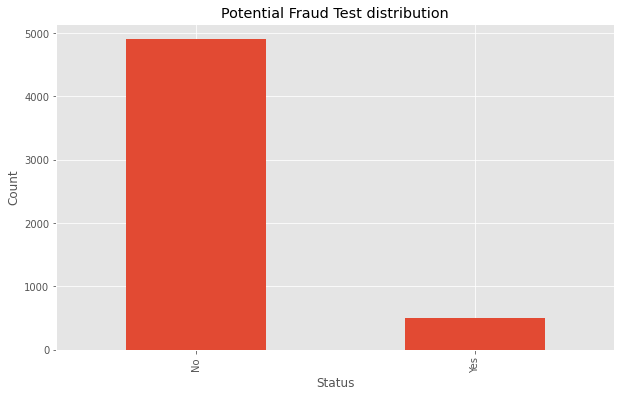

In [4]:
plt.title("Potential Fraud Test distribution")
Train.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# INPATIENT

# Inpatient Procedure Distribution

In [5]:
procedures =  pd.DataFrame(columns = ['Procedures'])
procedures['Procedures'] = pd.concat([
                                          Train_Inpatient["ClmProcedureCode_1"], 
                                          Train_Inpatient["ClmProcedureCode_2"], 
                                          Train_Inpatient["ClmProcedureCode_3"], 
                                          Train_Inpatient["ClmProcedureCode_4"], 
                                          Train_Inpatient["ClmProcedureCode_5"], 
                                          Train_Inpatient["ClmProcedureCode_6"]
                                          ], axis=0, sort=True).dropna()
                            
procedures.head(10)
procedure_group = procedures['Procedures'].value_counts()

procedure_g1 = procedure_group.to_frame()
procedure_g1.columns = ['count']
procedure_g1['Procedure'] = procedure_g1.index
procedure_g1['Percentage'] = (procedure_g1['count']/sum(procedure_g1['count']))*100

In [ ]:
procedure_g1.head(5)

,count,Procedure,Percentage
4019.0,1953,4019.0,6.577529
9904.0,1137,9904.0,3.829314
2724.0,1047,2724.0,3.526202
8154.0,1021,8154.0,3.438637
66.0,894,66.0,3.010912


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


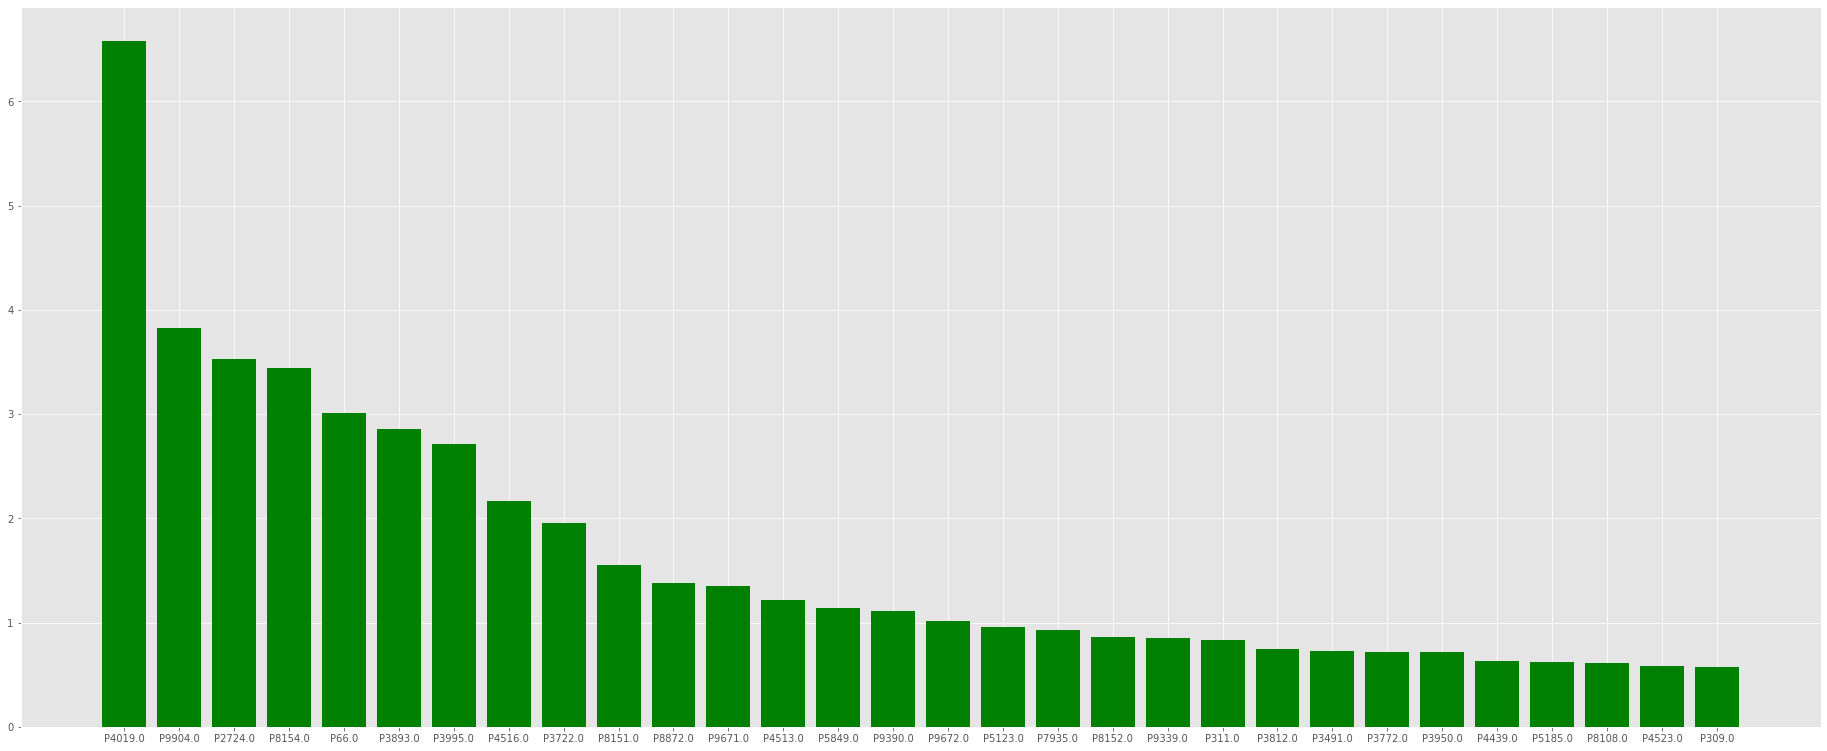

In [6]:
plot_procedure = procedure_g1.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_procedure['Procedure'] = 'P' + plot_procedure['Procedure'].astype(str)
plot_procedure.sort_values(by=['Percentage'])
ax.bar(plot_procedure['Procedure'],plot_procedure['Percentage'], color='green')
plt.show()

# Inpatient Diagnosis Distribution

In [7]:
diagnosis =  pd.DataFrame(columns = ['diagnosis'])
diagnosis['diagnosis'] = pd.concat([
                                          Train_Inpatient["ClmDiagnosisCode_1"], 
                                          Train_Inpatient["ClmDiagnosisCode_2"], 
                                          Train_Inpatient["ClmDiagnosisCode_3"], 
                                          Train_Inpatient["ClmDiagnosisCode_4"],
                                          Train_Inpatient["ClmDiagnosisCode_5"],
                                          Train_Inpatient["ClmDiagnosisCode_6"],
                                          Train_Inpatient["ClmDiagnosisCode_7"],
                                          Train_Inpatient["ClmDiagnosisCode_8"], 
                                          Train_Inpatient["ClmDiagnosisCode_9"], 
                                          Train_Inpatient["ClmDiagnosisCode_10"]
                                          ], axis=0, sort=True).dropna()
                            
diagnosis_group = diagnosis['diagnosis'].value_counts()

diagnosis_g1 = diagnosis_group.to_frame()
diagnosis_g1.columns = ['count']
diagnosis_g1['diagnosis'] = diagnosis_g1.index
diagnosis_g1['Percentage'] = (diagnosis_g1['count']/sum(diagnosis_g1['count']))*100

In [ ]:
diagnosis_g1.head()

,count,diagnosis,Percentage
4019,14153,4019,4.323798
2724,7340,2724,2.242399
25000,7334,25000,2.240566
41401,6442,41401,1.968057
4280,6190,4280,1.891070


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


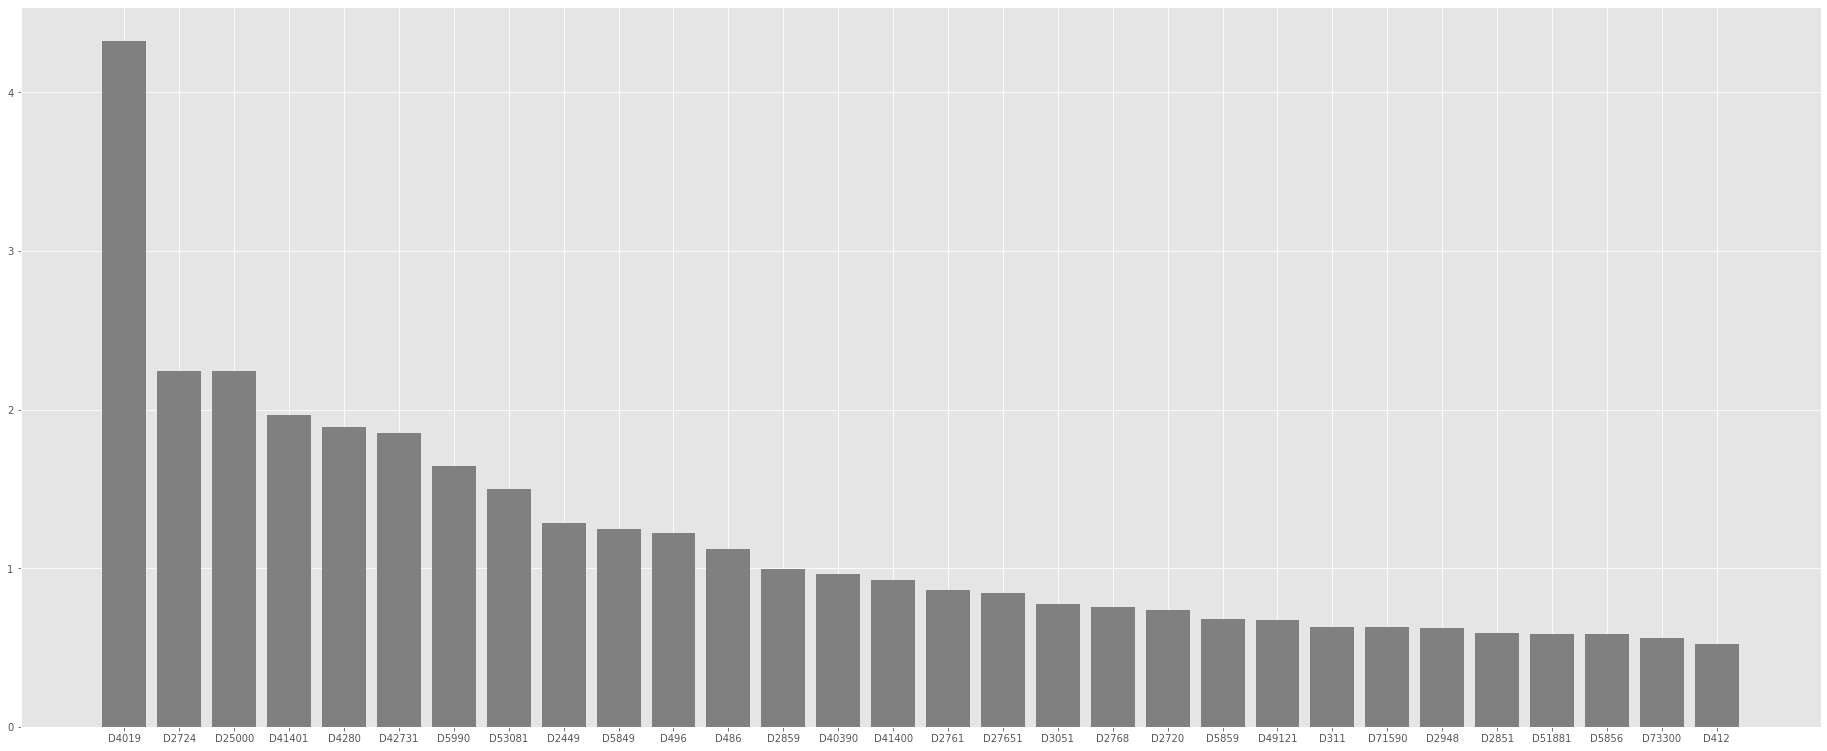

In [8]:
plot_diagnosis = diagnosis_g1.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_diagnosis['diagnosis'] = 'D' + plot_diagnosis['diagnosis'].astype(str)
plot_diagnosis.sort_values(by=['Percentage'])
ax.bar(plot_diagnosis['diagnosis'],plot_diagnosis['Percentage'], color='grey')
plt.show()

# OUTPATIENT

# Outpatient Procedure Distribution

In [9]:
procedures1 =  pd.DataFrame(columns = ['Procedures'])
procedures1['Procedures'] = pd.concat([
                                          Train_Outpatient["ClmProcedureCode_1"], 
                                          Train_Outpatient["ClmProcedureCode_2"], 
                                          Train_Outpatient["ClmProcedureCode_3"], 
                                          Train_Outpatient["ClmProcedureCode_4"], 
                                          Train_Outpatient["ClmProcedureCode_5"], 
                                          Train_Outpatient["ClmProcedureCode_6"]
                                          ], axis=0, sort=True).dropna()
                            
procedures1.head(10)
procedure1_group = procedures1['Procedures'].value_counts()

procedure_g2 = procedure1_group.to_frame()
procedure_g2.columns = ['count']
procedure_g2['Procedure'] = procedure_g2.index
procedure_g2['Percentage'] = (procedure_g2['count']/sum(procedure_g2['count']))*100

In [ ]:
procedure_g2.head()

,count,Procedure,Percentage
9904.0,15,9904.0,7.352941
3722.0,8,3722.0,3.921569
4516.0,8,4516.0,3.921569
2724.0,7,2724.0,3.431373
66.0,7,66.0,3.431373


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


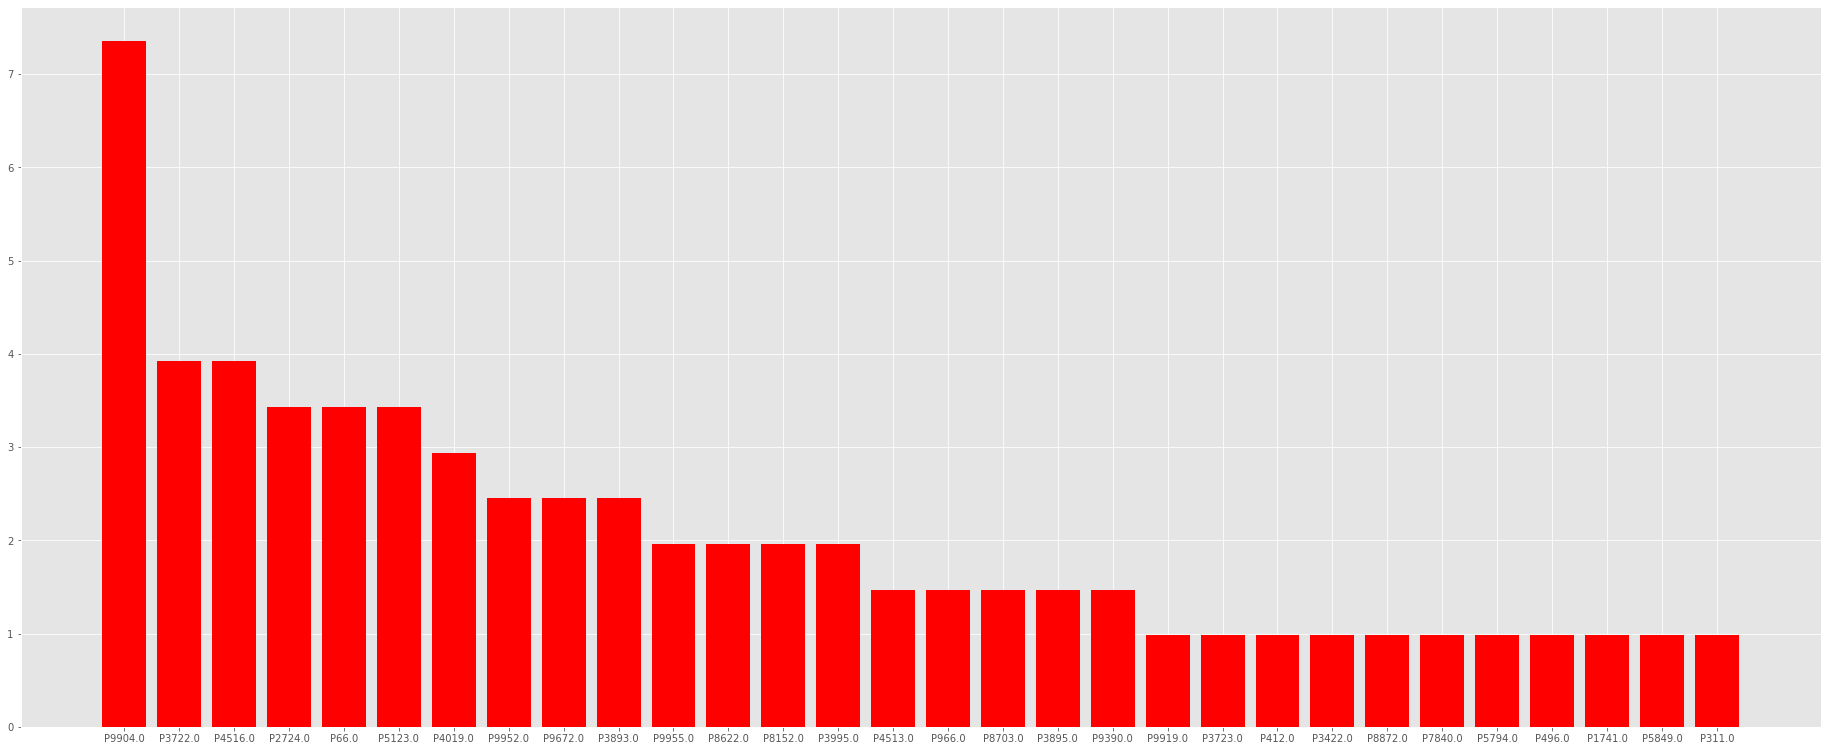

In [10]:
plot_procedure1 = procedure_g2.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_procedure1['Procedure'] = 'P' + plot_procedure1['Procedure'].astype(str)
plot_procedure1.sort_values(by=['Percentage'])
ax.bar(plot_procedure1['Procedure'],plot_procedure1['Percentage'], color='red')
plt.show()

# Outpatient Diagnosis Distribution

In [11]:
diagnosis1 =  pd.DataFrame(columns = ['diagnosis'])
diagnosis1['diagnosis'] = pd.concat([
                                          Train_Outpatient["ClmDiagnosisCode_1"], 
                                          Train_Outpatient["ClmDiagnosisCode_2"], 
                                          Train_Outpatient["ClmDiagnosisCode_3"], 
                                          Train_Outpatient["ClmDiagnosisCode_4"],
                                          Train_Outpatient["ClmDiagnosisCode_5"],
                                          Train_Outpatient["ClmDiagnosisCode_6"],
                                          Train_Outpatient["ClmDiagnosisCode_7"],
                                          Train_Outpatient["ClmDiagnosisCode_8"], 
                                          Train_Outpatient["ClmDiagnosisCode_9"], 
                                          Train_Outpatient["ClmDiagnosisCode_10"]
                                          ], axis=0, sort=True).dropna()
                            
diagnosis_group1 = diagnosis1['diagnosis'].value_counts()

diagnosis_g2 = diagnosis_group1.to_frame()
diagnosis_g2.columns = ['count']
diagnosis_g2['diagnosis'] = diagnosis_g2.index
diagnosis_g2['Percentage'] = (diagnosis_g2['count']/sum(diagnosis_g2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


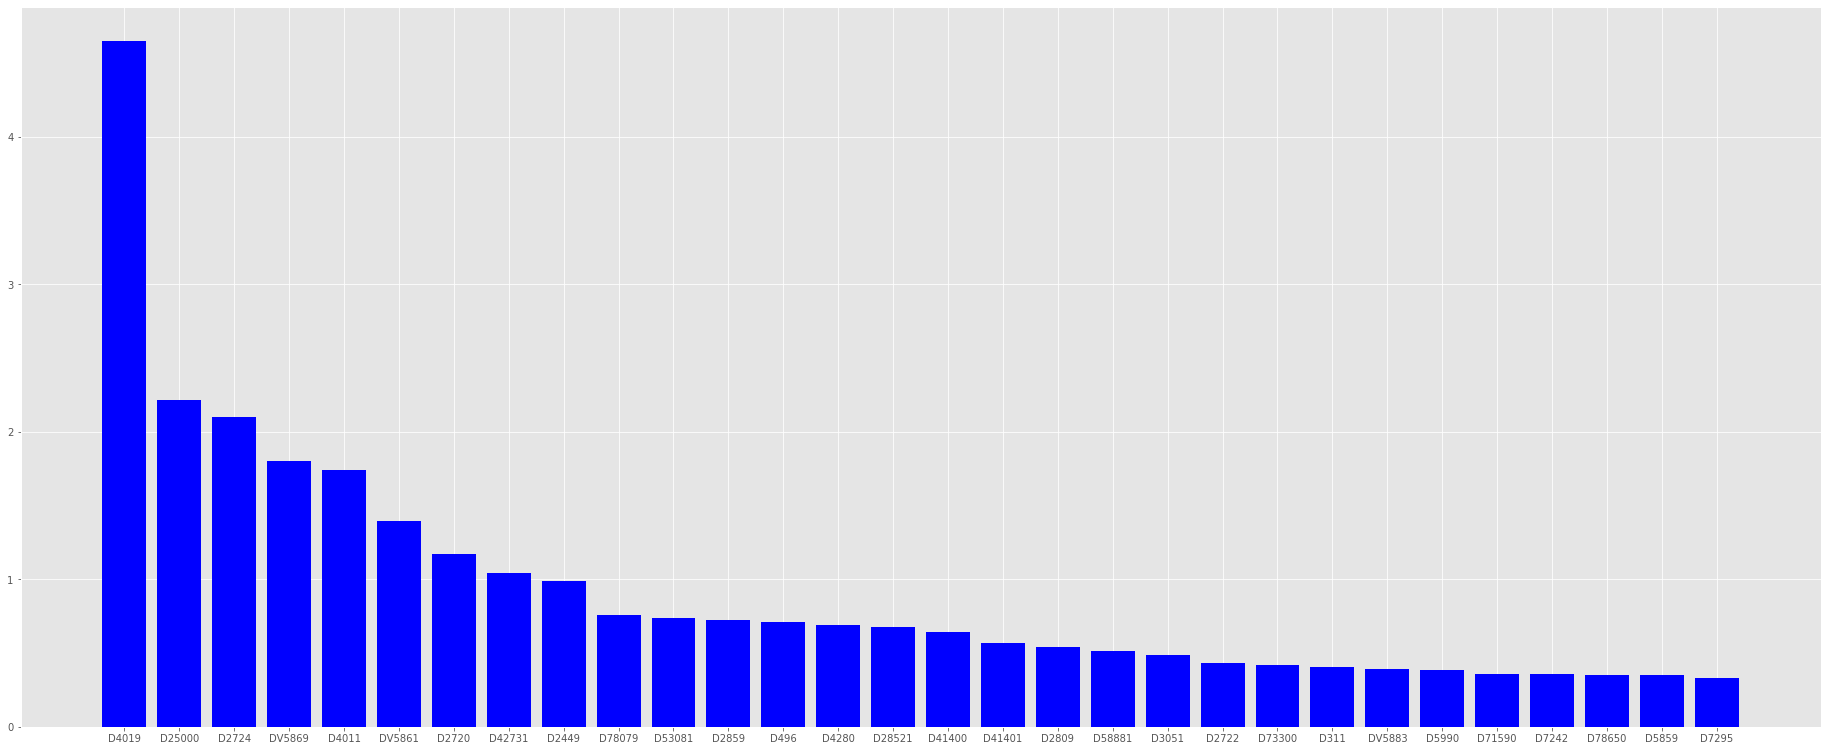

In [12]:
plot_diagnosis1 = diagnosis_g2.head(30)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_diagnosis1['diagnosis'] = 'D' + plot_diagnosis1['diagnosis'].astype(str)
plot_diagnosis1.sort_values(by=['Percentage'])
ax.bar(plot_diagnosis1['diagnosis'],plot_diagnosis1['Percentage'], color='blue')
plt.show()

# common procedures and diagnosis codes performed by the potential fradulent providers

In [13]:
len(Train_Inpatient)

40474

In [14]:
Train_fraud =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_fraud = Train.loc[(Train['PotentialFraud'] == 'Yes')]
fraud_provider_ip_df = pd.merge(Train_Inpatient, Train_fraud, how='inner', on='Provider')
len(fraud_provider_ip_df)

23402

In [15]:
print((len(fraud_provider_ip_df)/len(Train_Inpatient)) * 100, ' %')

57.81983495577408  %


Around 58% potential fradulent activities for **Inpatient**

In [16]:
len(Train_Outpatient)
fraud_provider_op_df = pd.merge(Train_Outpatient, Train_fraud, how='inner', on='Provider')
len(fraud_provider_op_df)

189394

In [18]:
print((len(fraud_provider_op_df)/len(Train_Outpatient))*100, ' %')

36.58112130290089  %


Around 36% potential fradulent activities for **Outpatient**

# INPATIENT

## Procedure

In [19]:
procedures2 =  pd.DataFrame(columns = ['Procedures'])
procedures2['Procedures'] = pd.concat([
                                      fraud_provider_ip_df["ClmProcedureCode_1"], 
                                      fraud_provider_ip_df["ClmProcedureCode_2"], 
                                      fraud_provider_ip_df["ClmProcedureCode_3"], 
                                      fraud_provider_ip_df["ClmProcedureCode_4"], 
                                      fraud_provider_ip_df["ClmProcedureCode_5"], 
                                      fraud_provider_ip_df["ClmProcedureCode_6"]
                        ], axis=0, sort=True).dropna()

procedures2['Procedures'].head(10)
grouped_F_procedure = procedures2['Procedures'].value_counts()

In [20]:
grouped_F_procedure2 = grouped_F_procedure.to_frame()
grouped_F_procedure2.columns = ['count']
grouped_F_procedure2['Procedure'] = grouped_F_procedure2.index
grouped_F_procedure2['Percentage'] = (grouped_F_procedure2['count']/sum(grouped_F_procedure2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


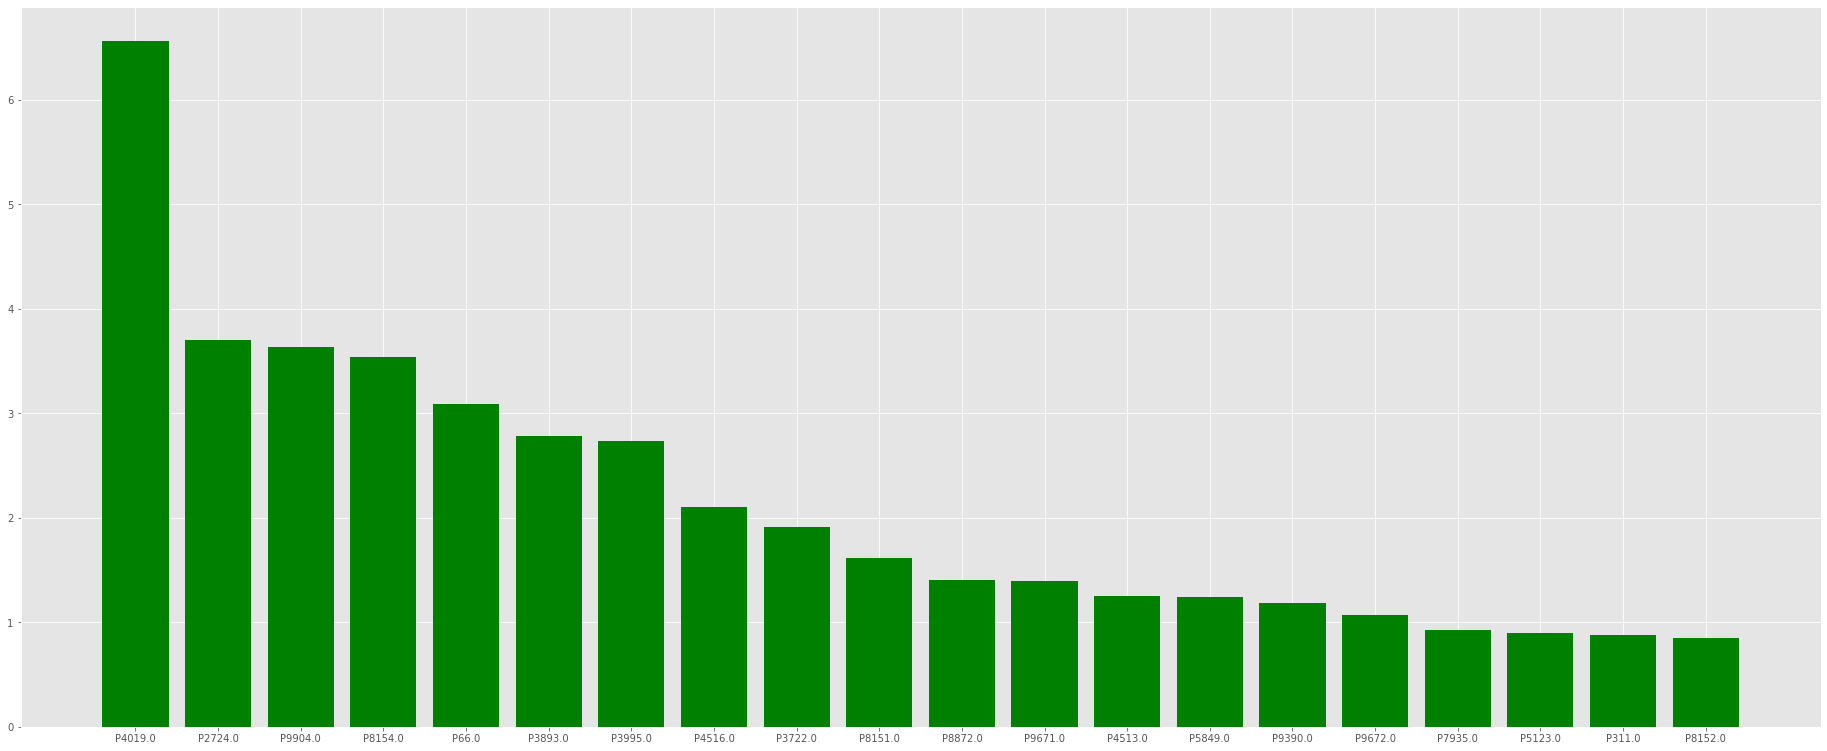

In [23]:
plot_F_procedure = grouped_F_procedure2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_procedure['Procedure'] = 'P' + plot_F_procedure['Procedure'].astype(str)
plot_F_procedure.sort_values(by=['Percentage'])
ax.bar(plot_F_procedure['Procedure'],plot_F_procedure['Percentage'], color='green')
plt.show()

## Diagnosis

In [24]:
diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
diagnosis2['Diagnosis'] = pd.concat([
                                        fraud_provider_ip_df["ClmDiagnosisCode_1"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_2"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_3"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_4"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_5"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_6"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_7"],  
                                        fraud_provider_ip_df["ClmDiagnosisCode_8"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_9"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_10"]
                                        ], axis=0, sort=True).dropna()
diagnosis2['Diagnosis'].head(10)
grouped_F_diagnosis = diagnosis2['Diagnosis'].value_counts()

In [25]:
grouped_F_diagnosis2 = grouped_F_diagnosis.to_frame()
grouped_F_diagnosis2.columns = ['count']
grouped_F_diagnosis2['Diagnosis'] = grouped_F_diagnosis2.index
grouped_F_diagnosis2['Percentage'] = (grouped_F_diagnosis2['count']/sum(grouped_F_diagnosis2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


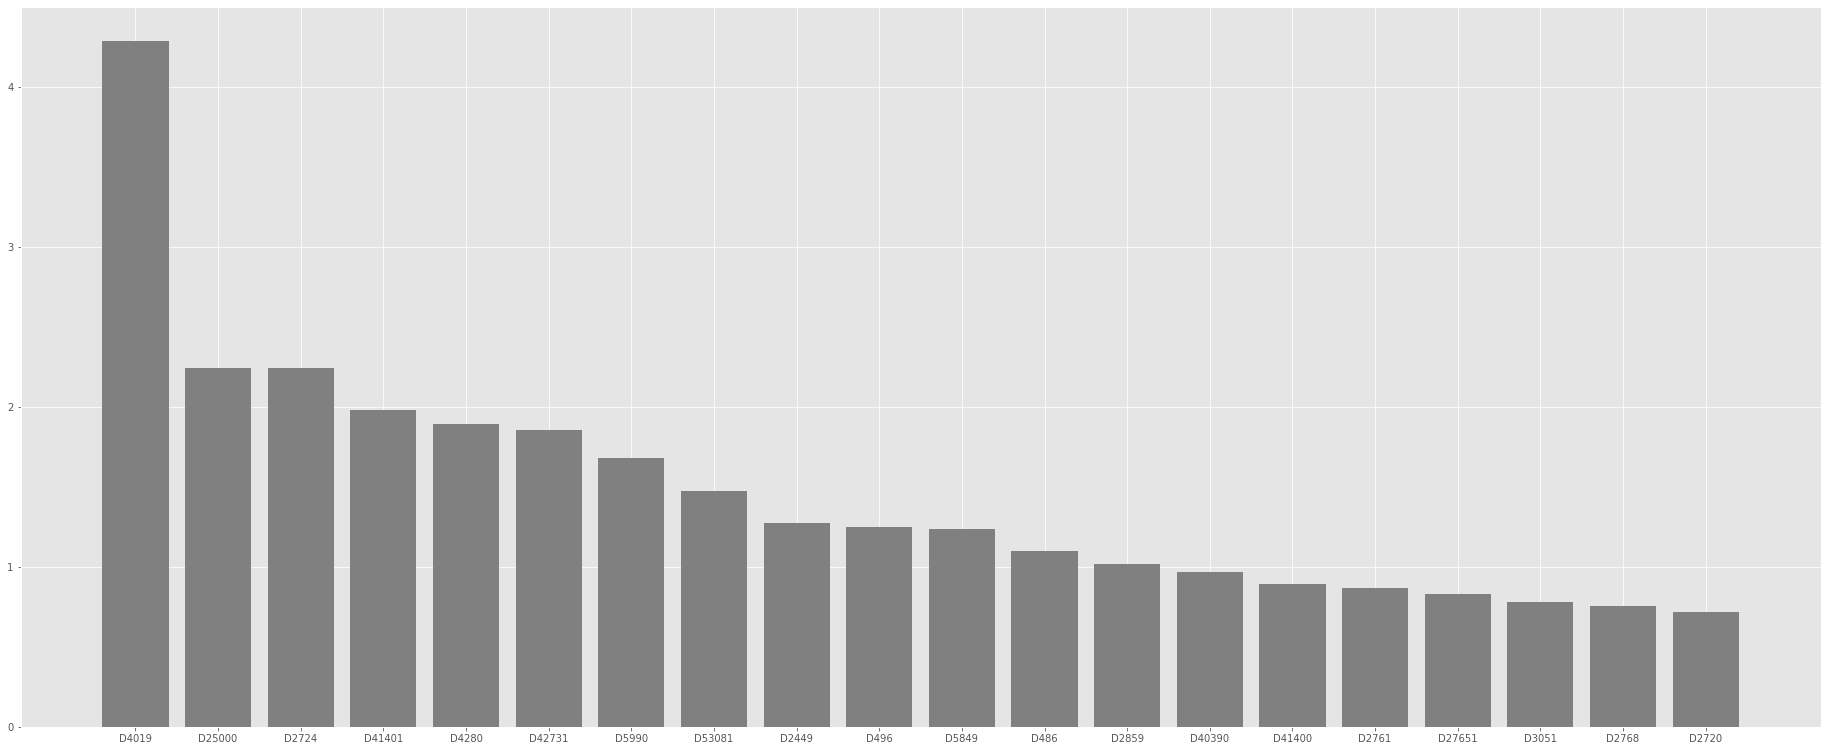

In [26]:
plot_F_diagnosis = grouped_F_diagnosis2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_diagnosis['Diagnosis'] = 'D' + plot_F_diagnosis['Diagnosis'].astype(str)
plot_F_diagnosis.sort_values(by=['Percentage'])
ax.bar(plot_F_diagnosis['Diagnosis'],plot_F_diagnosis['Percentage'], color='grey')
plt.show()

# OUTPATIENT

## Procedure

In [27]:
procedures2 =  pd.DataFrame(columns = ['Procedures'])
procedures2['Procedures'] = pd.concat([
                                             fraud_provider_op_df["ClmProcedureCode_1"], 
                                             fraud_provider_op_df["ClmProcedureCode_2"], 
                                             fraud_provider_op_df["ClmProcedureCode_3"], 
                                             fraud_provider_op_df["ClmProcedureCode_4"], 
                                             fraud_provider_op_df["ClmProcedureCode_5"], 
                                             fraud_provider_op_df["ClmProcedureCode_6"]
                                             ], axis=0, sort=True).dropna()
procedures2['Procedures'].head(10)
grouped_F_procedure2 = procedures2['Procedures'].value_counts()

In [28]:
grouped_F_procedure_opdf2 = grouped_F_procedure2.to_frame()
grouped_F_procedure_opdf2.columns = ['count']
grouped_F_procedure_opdf2['Procedure'] = grouped_F_procedure_opdf2.index
grouped_F_procedure_opdf2['Percentage'] = (grouped_F_procedure_opdf2['count']/sum(grouped_F_procedure_opdf2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


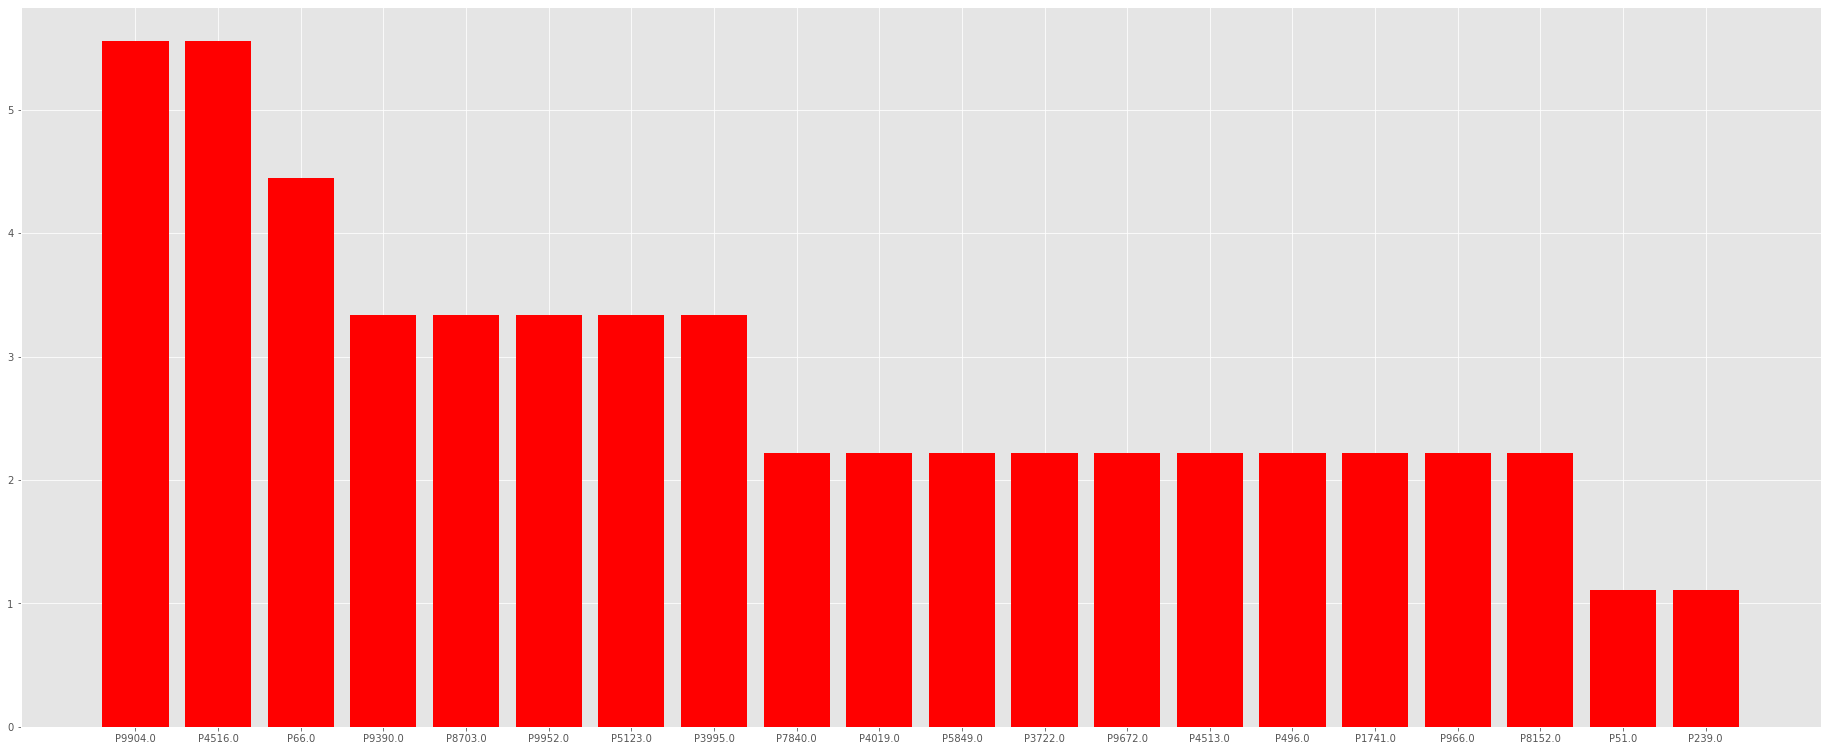

In [32]:

plot_F_procedure_opdf1 = grouped_F_procedure_opdf2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_procedure_opdf1['Procedure'] = 'P' + plot_F_procedure_opdf1['Procedure'].astype(str)
plot_F_procedure_opdf1.sort_values(by=['Percentage'])
ax.bar(plot_F_procedure_opdf1['Procedure'],plot_F_procedure_opdf1['Percentage'], color='red')
plt.show()

# Diagnosis

In [30]:
diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
diagnosis2['Diagnosis'] = pd.concat([
                                           fraud_provider_op_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_4"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_6"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_7"],  
                                           fraud_provider_op_df["ClmDiagnosisCode_8"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_9"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_10"]
                                           ], axis=0, sort=True).dropna()
diagnosis2['Diagnosis'].head(10)
grouped_F_diagnosis2 = diagnosis2['Diagnosis'].value_counts()

In [31]:
grouped_F_diagnosis_opdf2 = grouped_F_diagnosis2.to_frame()
grouped_F_diagnosis_opdf2.columns = ['count']
grouped_F_diagnosis_opdf2['Diagnosis'] = grouped_F_diagnosis_opdf2.index
grouped_F_diagnosis_opdf2['Percentage'] = (grouped_F_diagnosis_opdf2['count']/sum(grouped_F_diagnosis_opdf2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


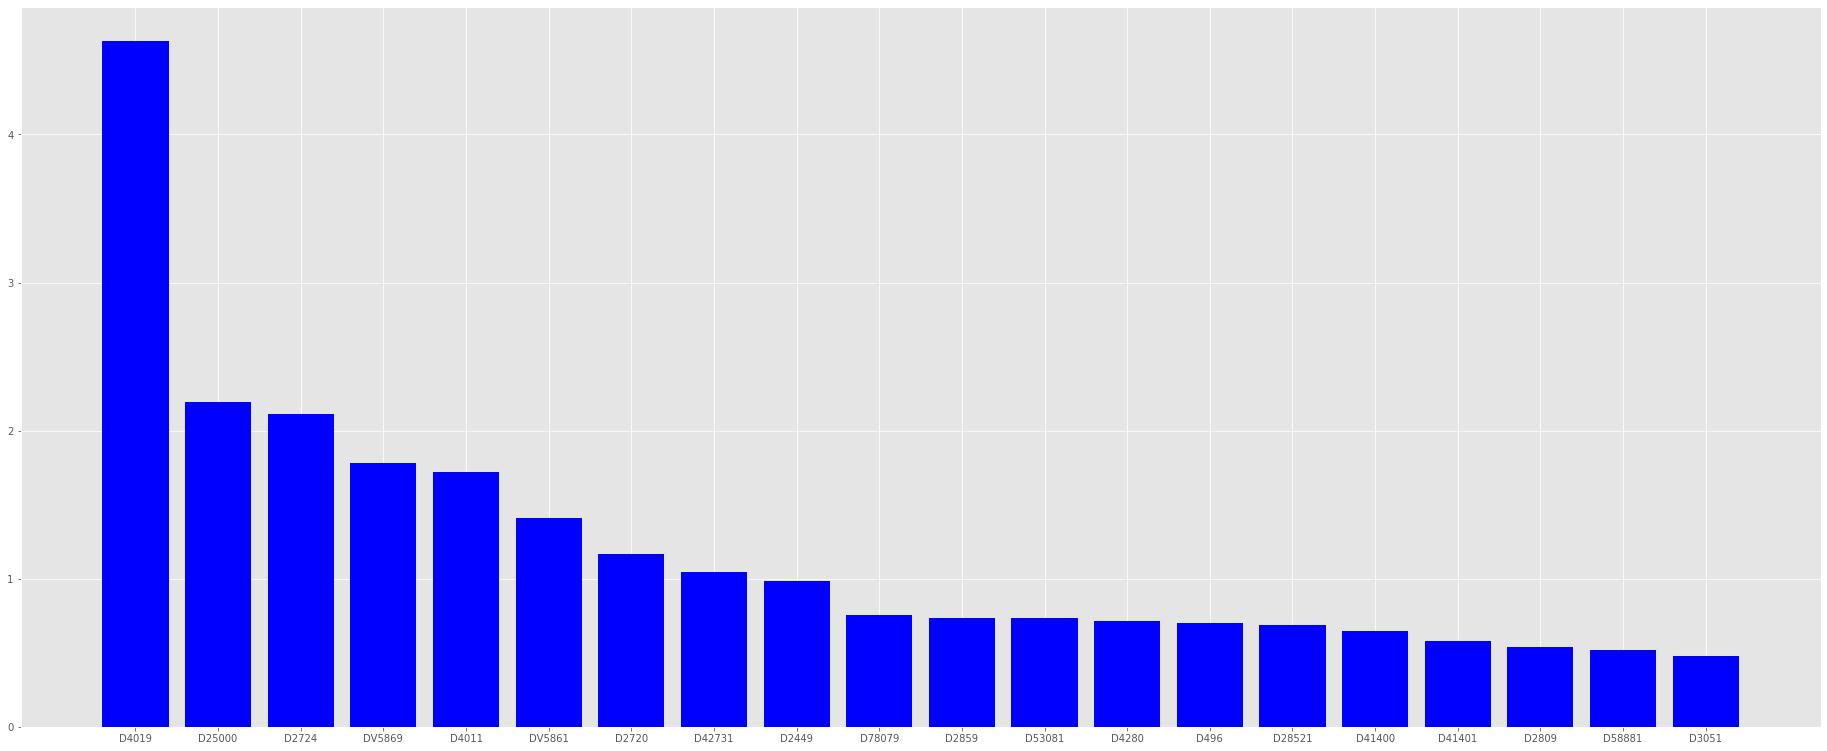

In [34]:
plot_F_diagnosis_opdf1 = grouped_F_diagnosis_opdf2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_diagnosis_opdf1['Diagnosis'] = 'D' + plot_F_diagnosis_opdf1['Diagnosis'].astype(str)
plot_F_diagnosis_opdf1.sort_values(by=['Percentage'])
ax.bar(plot_F_diagnosis_opdf1['Diagnosis'],plot_F_diagnosis_opdf1['Percentage'], color='blue')
plt.show()

# States having the highest number of potential frauds

In [42]:
fraud_beneficiary_ip_op_df = pd.merge(Train_Beneficiary, fraud_provider_ip_df, how='inner', on='BeneID')
fraud_beneficiary_ip_op_df = pd.merge(Train_Beneficiary, fraud_provider_op_df, how='inner', on='BeneID')
Train_F_Beneficiary_grouped = fraud_beneficiary_ip_op_df['State'].value_counts()
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped.to_frame()
Train_F_Beneficiary_grouped1['Count'] =  Train_F_Beneficiary_grouped1['State']
Train_F_Beneficiary_grouped1['STATE'] = Train_F_Beneficiary_grouped1.index
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.drop(['State'], axis = 1)

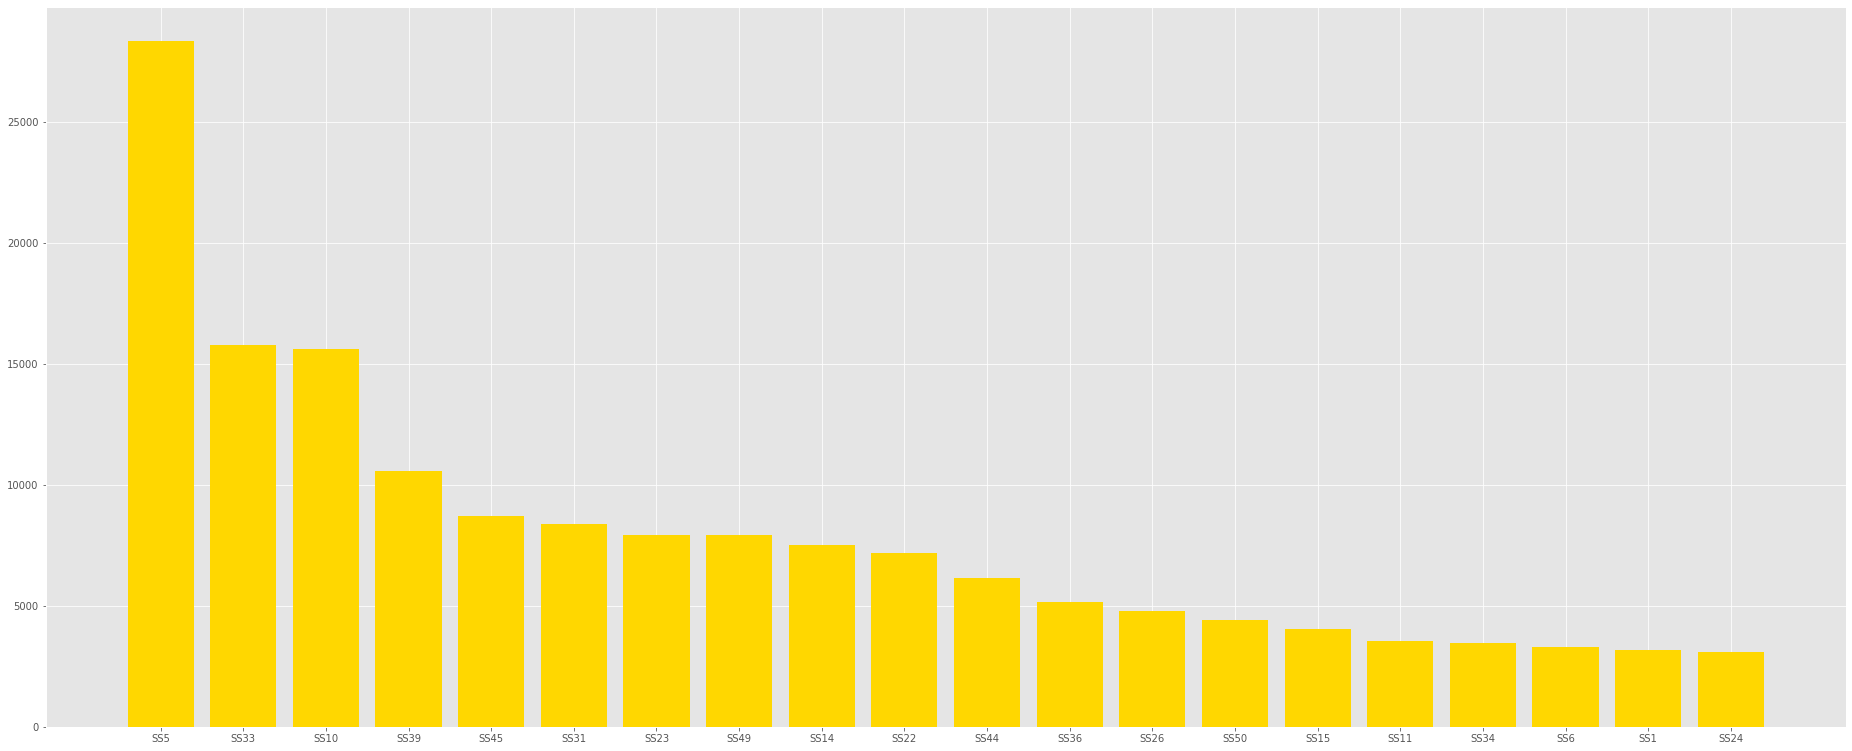

In [44]:
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

Train_F_Beneficiary_grouped1['STATE'] = 'S' + Train_F_Beneficiary_grouped1['STATE'].astype(str)
ax.bar(Train_F_Beneficiary_grouped1['STATE'],Train_F_Beneficiary_grouped1['Count'], color='gold')
plt.show()

# Age distribution for the probable fradulent activites 

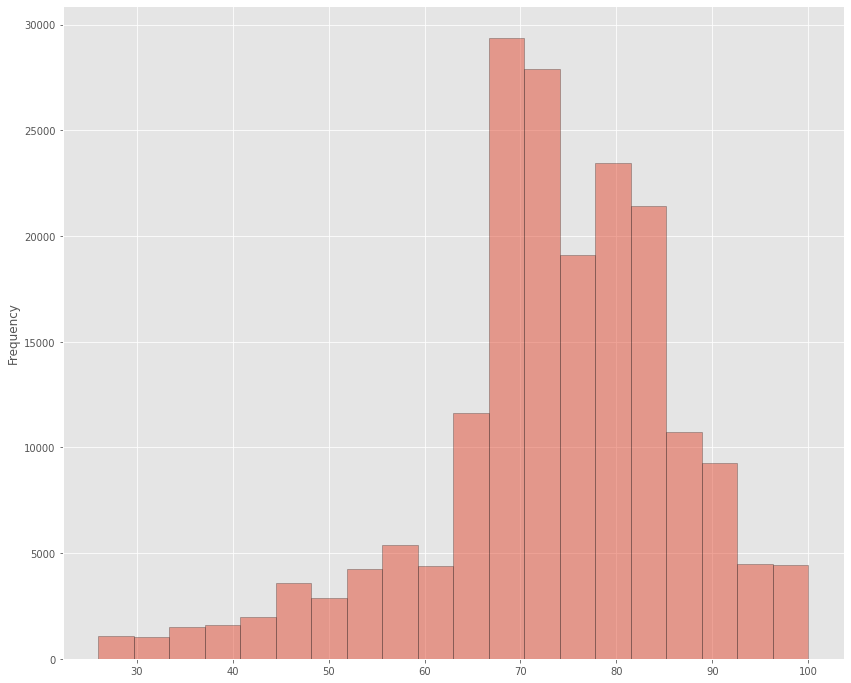

In [47]:
import seaborn as sns

fraud_beneficiary_ip_op_df['DOB'] =  pd.to_datetime(fraud_beneficiary_ip_op_df['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
fraud_beneficiary_ip_op_df['DOB'] = fraud_beneficiary_ip_op_df['DOB'].where(fraud_beneficiary_ip_op_df['DOB'] < now, fraud_beneficiary_ip_op_df['DOB'] -  np.timedelta64(100, 'Y'))   # 2
fraud_beneficiary_ip_op_df['age'] = (now - fraud_beneficiary_ip_op_df['DOB']).astype('<m8[Y]')    # 3
ax = fraud_beneficiary_ip_op_df['age'].plot.hist(bins=20, alpha=0.5, figsize=(14, 12), edgecolor='k')

# Age distribution for Whole Inpatient data


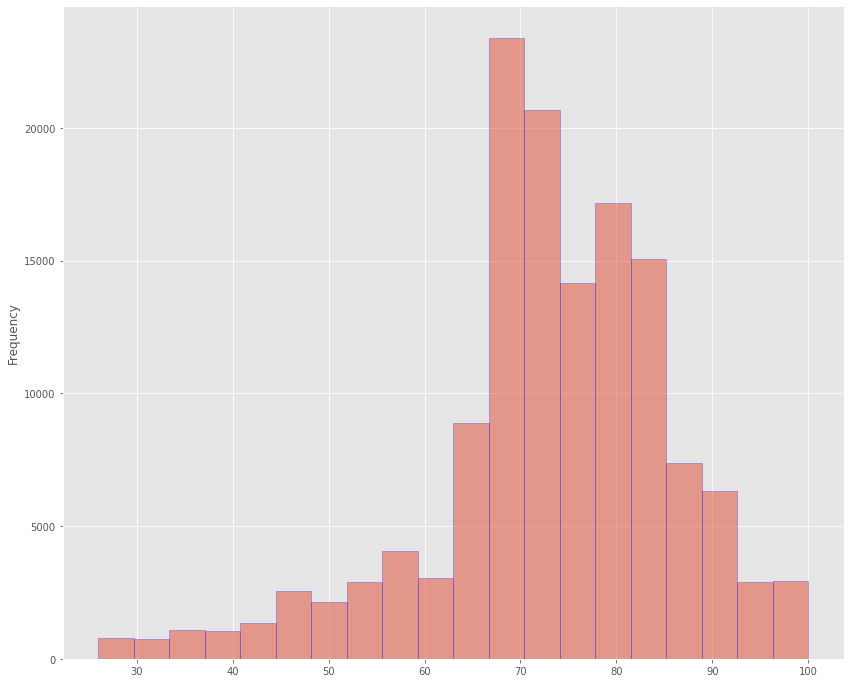

In [49]:
Train_Beneficiary['DOB'] =  pd.to_datetime(Train_Beneficiary['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
Train_Beneficiary['DOB'] = Train_Beneficiary['DOB'].where(Train_Beneficiary['DOB'] < now, Train_Beneficiary['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Train_Beneficiary['age'] = (now - Train_Beneficiary['DOB']).astype('<m8[Y]')    # 3
ax = Train_Beneficiary['age'].plot.hist(bins=20, alpha=0.5, figsize=(14, 12), edgecolor='b')

# Cost Distribution for INPATIENT data

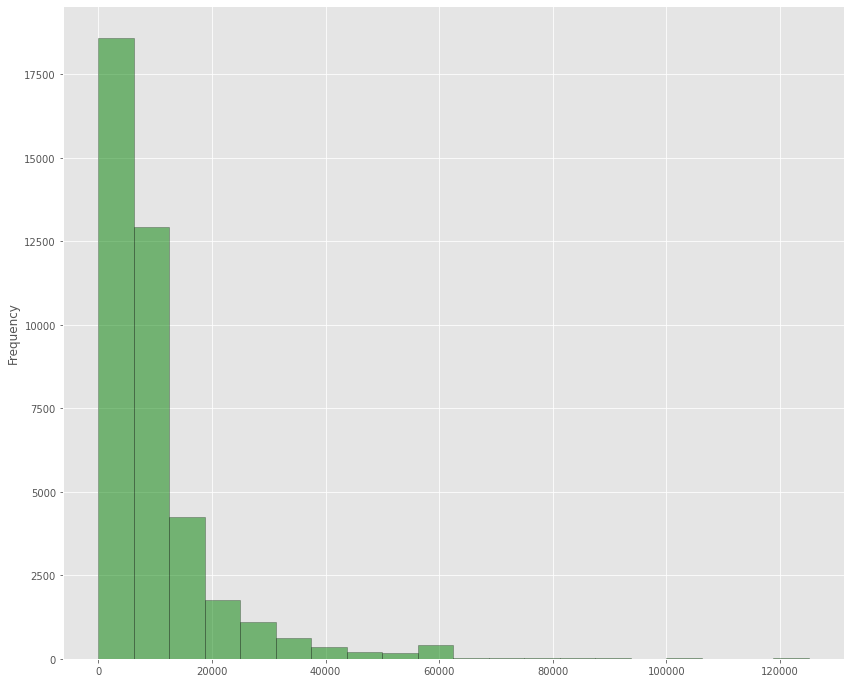

In [51]:
ax = Train_Inpatient['InscClaimAmtReimbursed'].plot.hist(bins=20, alpha=0.5, figsize=(14, 12), facecolor='g', edgecolor='k')

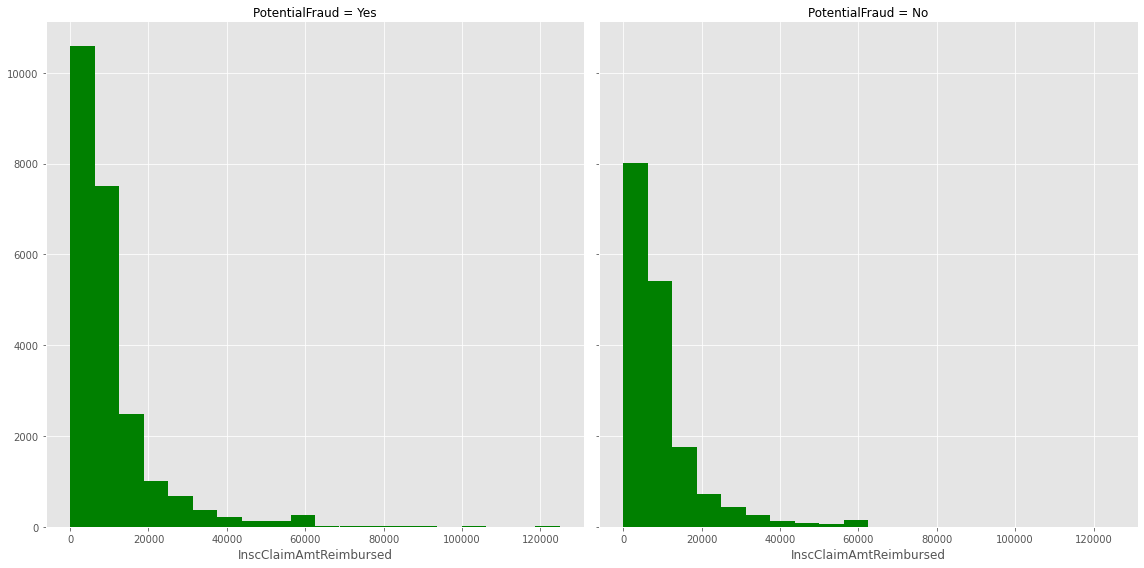

In [52]:
Train_Inpatient_1 = pd.merge(Train_Inpatient, Train, how='inner', on='Provider')
g = sns.FacetGrid(Train_Inpatient_1, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, color = 'g')

# Total amount suspected for fraud

In [55]:
Train_Inpatient_1 = Train_Inpatient_1.loc[(Train_Inpatient_1['PotentialFraud'] == 'Yes')]
Total = Train_Inpatient_1['InscClaimAmtReimbursed'].sum()
print('$',Total)

$ 241288510


# Cost Distribution for OUTPATIENT data

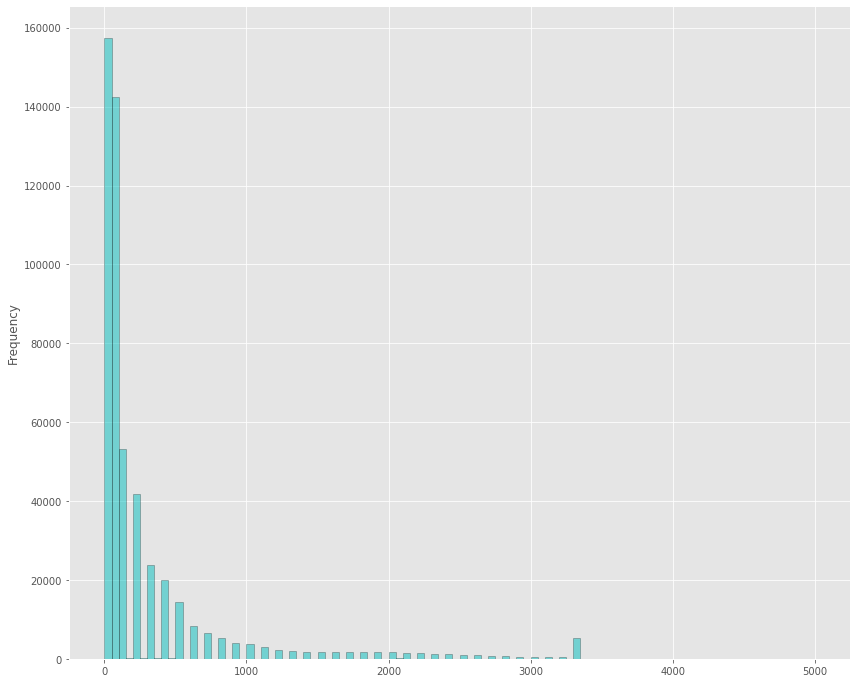

In [56]:
ax = Train_Outpatient['InscClaimAmtReimbursed'].plot.hist(bins=100,range=[0, 5000], alpha=0.5, figsize=(14, 12), facecolor='c', edgecolor='k')

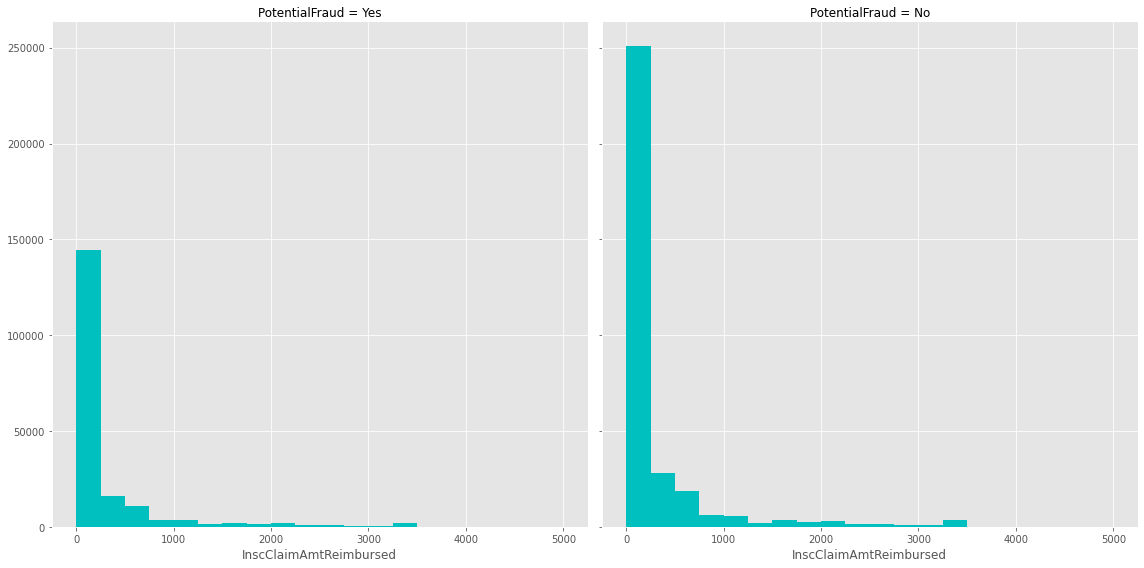

In [57]:
Train_Outpatient_1 = pd.merge(Train_Outpatient, Train, how='inner', on='Provider')
g = sns.FacetGrid(Train_Outpatient_1, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, range=[0, 5000], color ='c')